In [123]:
import numpy as np
from keras.datasets import reuters
WORDS_NUMBER = 20000

In [124]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=WORDS_NUMBER)

In [125]:
len(train_data)

8982

In [126]:
len(test_data)

2246

In [127]:

uniq, count = np.unique( train_labels, return_counts=True)
count

array([  55,  432,   74, 3159, 1949,   17,   48,   16,  139,  101,  124,
        390,   49,  172,   26,   20,  444,   39,   66,  549,  269,  100,
         15,   41,   62,   92,   24,   15,   48,   19,   45,   39,   32,
         11,   50,   10,   49,   19,   19,   24,   36,   30,   13,   21,
         12,   18], dtype=int64)

In [128]:
word_index = reuters.get_word_index()

In [129]:
type(word_index)

dict

In [130]:
word_items =  word_index.items()
word_items_list = list(word_items)
word_items_list[12]

('heublein', 8352)

In [131]:
type(x)

list

In [132]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(WORDS_NUMBER,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [133]:
from keras.utils.np_utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)



In [134]:
def vectorize_sequences(sequences, dimension=WORDS_NUMBER):        
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results


x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [135]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [136]:
x_val = x_train[:900]
partial_x_train = x_train[900:]

y_val = one_hot_train_labels[:900]
partial_y_train = one_hot_train_labels[900:]

In [137]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 8082 samples, validate on 900 samples
Epoch 1/20
8082/8082 [==============================] - 6s 740us/step - loss: 2.3697 - acc: 0.5068 - val_loss: 1.4766 - val_acc: 0.6589
Epoch 2/20
8082/8082 [==============================] - 4s 546us/step - loss: 1.1937 - acc: 0.7315 - val_loss: 1.1985 - val_acc: 0.7367
Epoch 3/20
8082/8082 [==============================] - 4s 544us/step - loss: 0.8443 - acc: 0.8114 - val_loss: 1.0640 - val_acc: 0.7644
Epoch 4/20
8082/8082 [==============================] - 4s 552us/step - loss: 0.6168 - acc: 0.8619 - val_loss: 1.0147 - val_acc: 0.7778
Epoch 5/20
8082/8082 [==============================] - 4s 547us/step - loss: 0.4470 - acc: 0.9027 - val_loss: 1.0599 - val_acc: 0.7667
Epoch 6/20
8082/8082 [==============================] - 4s 547us/step - loss: 0.3398 - acc: 0.9271 - val_loss: 0.9517 - val_acc: 0.8133
Epoch 7/20
8082/8082 [==============================] - 4s 549us/step - loss: 0.2618 - acc: 0.9431 - val_loss: 0.9735 - val_acc: 0.8122
E

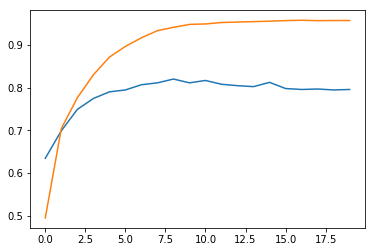

In [113]:
history.history['val_acc']
plt.plot(history.history['val_acc'])
plt.plot(history.history['acc'])

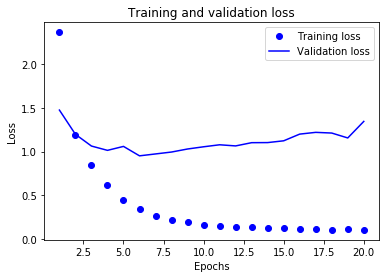

In [138]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

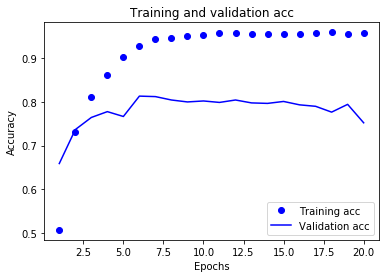

In [139]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [140]:
predictions = model.predict(x_test)

In [141]:
np.argmax(predictions[4])

13